In [11]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil

In [4]:
model = tf.keras.models.load_model("models/handwash_model_v1.1.keras")

2024-12-01 13:19:05.381548: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:19:05.559633: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:19:05.593407: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:19:05.972322: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2024-12-01 13:19:06.006830: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.


In [5]:
labels_dict = {0: "Rub both wrists in rotating manner",
            1: "Rub your palms together",
            2: "Rub the back of your fingers and hands",
            3: "Rub your hands by interlocking your fingers",
            4: "Interlock fingers and rub the back of fingers of both hands",
            5: "Rub the area between index finger and thumb",
            6: "Rub fingertips on palm of both hands in circular manner"}

### Prediction on Live Feed from Camera

In [17]:
# Creating directory to save frames captured by camera
os.makedirs("dataset/camera", exist_ok=True)

In [18]:
cap = cv2.VideoCapture(0)
frame_number = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_number%30 == 0:
        cv2.imwrite(f"dataset/camera/{frame_number}.jpg", frame)
        img = frame[..., ::-1] / 255.
        img = cv2.resize(img, (256, 256))
        # img = cv2.rotate(img, cv2.ROTATE_180)
        img = np.expand_dims(img, axis=0)
        probas = model.predict(img, verbose=0)
        label = probas.argmax()
        proba = f"{probas.max():.2f}"

    cv2.putText(frame, f"Prediction: {labels_dict[label]}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(frame, f"Confidence: {proba}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow("Live Prediction", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

    frame_number += 1

cap.release()
cv2.destroyAllWindows()

In [16]:
# Clear dataset/camera directory
# shutil.rmtree("dataset/camera/")

In [69]:
num_total_preds = 0
num_correct_preds = 0
for filename in os.listdir("dataset/vikas/2"):
    img = cv2.imread(f"dataset/vikas/2/{filename}")[..., ::-1]
    img = cv2.resize(img, (256, 256)) / 255.
    img = cv2.rotate(img, cv2.ROTATE_180)
    predicted_label = model.predict(np.expand_dims(img, axis=0), verbose=0).argmax()
    if predicted_label == 2:
        num_correct_preds += 1
    num_total_preds += 1

In [70]:
num_correct_preds/num_total_preds*100

33.33333333333333

In [71]:
num_total_preds

15

In [72]:
num_correct_preds

5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


'Rub the area between index finger and thumb'

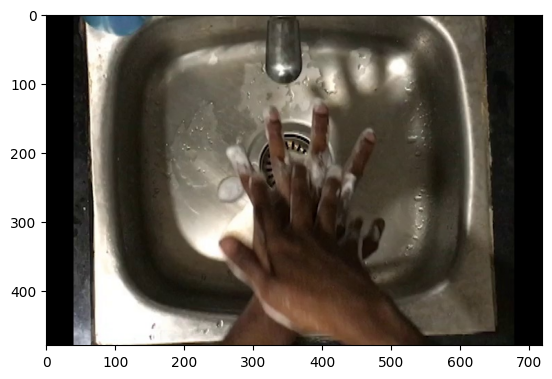

In [50]:
img = cv2.imread("/home/vikas/Projects/freelancing/research/dataset/frames/test/2/HandWash_001_A_03_G_01_frame_0.jpg")[..., ::-1]
plt.imshow(img)

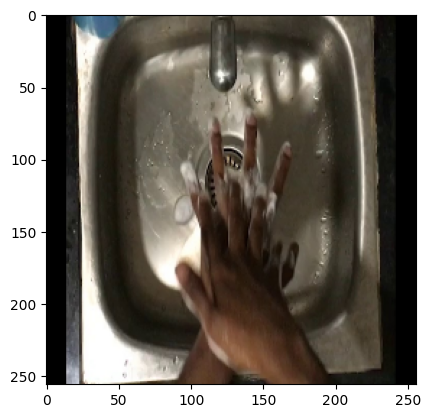

In [51]:
img = cv2.resize(img, (256, 256))
plt.imshow(img)

In [52]:
img = img / 255.

In [55]:
labels_dict[model.predict(np.expand_dims(img, axis=0)).argmax()]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


'Rub the back of your fingers and hands'

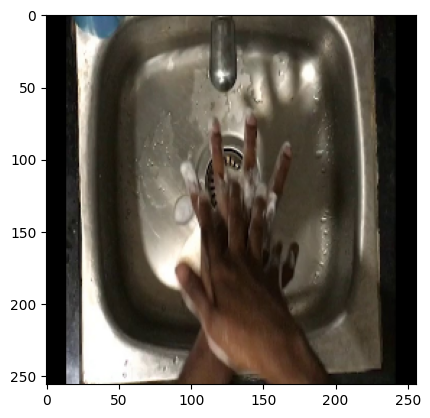

In [56]:
plt.imshow(img)

In [61]:
labels_dict[model.predict(np.expand_dims(cv2.rotate(img, cv2.ROTATE_180), axis=0)).argmax()]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


'Rub the back of your fingers and hands'

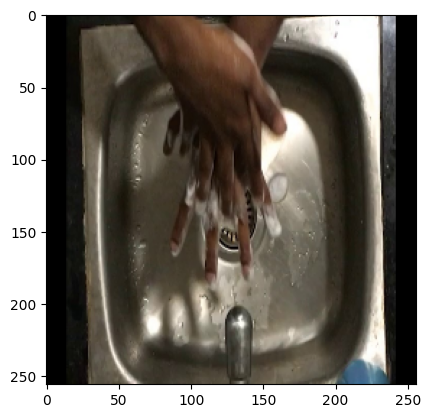

In [62]:
plt.imshow(cv2.rotate(img, cv2.ROTATE_180))

In [73]:
import tensorflow as tf

In [75]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=180
)

In [77]:
train_generator = datagen.flow_from_directory(
    "dataset/vikas"
)

Found 15 images belonging to 1 classes.


In [78]:
for i in train_generator.take(1):
    print(i)

AttributeError: 'DirectoryIterator' object has no attribute 'take'

In [79]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [80]:
for x_batch, y_batch in train_generator:
    print(x_batch)

[[[[2.85714893e+01 5.05719109e+01 4.97144661e+01]
   [2.79061584e+01 5.36353874e+01 5.04530792e+01]
   [2.42412491e+01 5.24137497e+01 4.86206245e+01]
   ...
   [3.29638405e+01 1.01205301e+00 1.98794699e+00]
   [3.68985901e+01 1.77971792e+00 5.11887169e+00]
   [4.08574448e+01 4.28595543e+00 1.00004225e+01]]

  [[2.73391533e+01 4.46783066e+01 4.68985901e+01]
   [2.83905354e+01 4.91242867e+01 4.91716080e+01]
   [2.89918747e+01 5.39972916e+01 5.09959373e+01]
   ...
   [3.59938240e+01 1.59876502e+00 4.39506006e+00]
   [3.99526787e+01 3.56214404e+00 8.73375225e+00]
   [4.44584541e+01 7.82306957e+00 1.48230696e+01]]

  [[2.48553638e+01 3.99035759e+01 4.29156303e+01]
   [2.67962952e+01 4.35925903e+01 4.59938240e+01]
   [2.82095833e+01 4.76766663e+01 4.86287498e+01]
   ...
   [3.90479164e+01 2.83833265e+00 7.46708202e+00]
   [4.30108337e+01 6.01354122e+00 1.30135412e+01]
   [4.93450012e+01 1.39312506e+01 2.09312515e+01]]

  ...

  [[1.44137497e+01 3.00000000e+00 9.62062454e+00]
   [1.59972916e+

KeyboardInterrupt: 